<a href="https://colab.research.google.com/github/marvel6757/Machine-Learning/blob/main/Regression/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values


In [4]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


I am not using the train test split in order to leverage maximum data to train the model( to predict the data of 6.5)

## Training the Linear Regression model on the whole dataset

In [6]:
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression()
lin_regressor.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

We are preprocesssing the features of X into x1, square of x1, cube of x1 ... in a form of matrix and use with our lin_regressor

In [12]:
from sklearn.preprocessing import PolynomialFeatures

#this generates the polynomial matrix of x1 and stores it as X_poly
poly_regressor = PolynomialFeatures(degree=4)
X_poly = poly_regressor.fit_transform(X)

# generating polynomial linear regression model with Polynomial matrix of features
lin_regressor_2 = LinearRegression()
lin_regressor_2.fit(X_poly, y)

LinearRegression()

In [17]:
print(X_poly)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


## Visualising the Linear Regression results

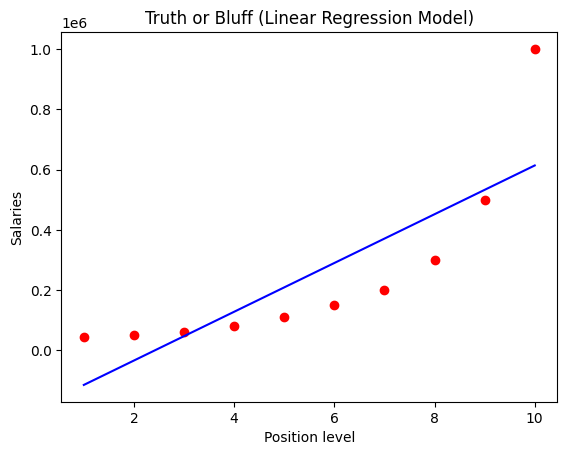

In [10]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_regressor.predict(X),color='blue')
plt.title('Truth or Bluff (Linear Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salaries')
plt.show()

## Visualising the Polynomial Regression results

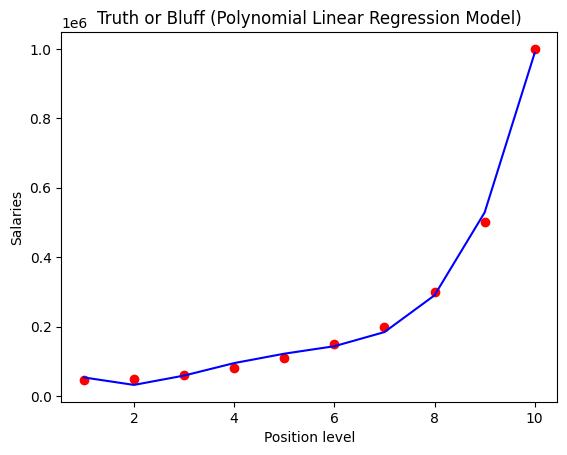

In [13]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_regressor_2.predict(X_poly),color='blue')
plt.title('Truth or Bluff (Polynomial Linear Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salaries')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

<ipython-input-15-0fabc6abeb8b>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid= np.arange(min(X),max(X),0.1)


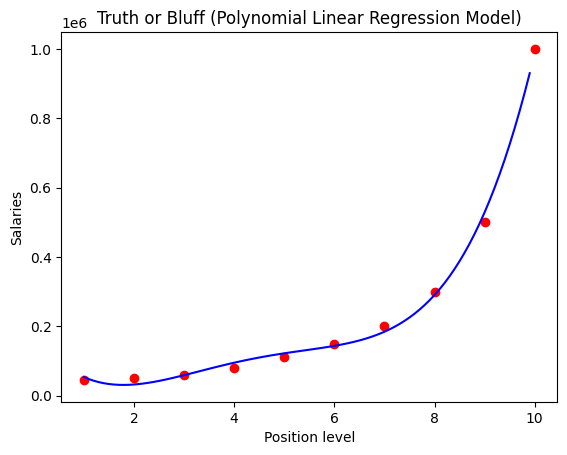

In [15]:
X_grid= np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_regressor_2.predict(poly_regressor.fit_transform(X_grid)),color='blue')
plt.title('Truth or Bluff (Polynomial Linear Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salaries')
plt.show()

## Predicting a new result with Linear Regression

the predict takes an array[[]] first bracket refers to rows n second bracket refers to columns or sparse matrix,

In [16]:
lin_regressor.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [19]:
lin_regressor_2.predict(poly_regressor.fit_transform([[6.5]]))

array([158862.45265155])